In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
import pydotplus
import collections
from IPython.display import Image, display
%matplotlib inline

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [13]:
p, N = 5, 30
means = np.zeros(shape=(p))
covs = np.diag(np.ones(shape=(p)))
np.place(covs, covs == 0, 0.95)
X = np.random.multivariate_normal(means, covs, N)
X_test = np.random.multivariate_normal(means, covs, 10000)

In [14]:
def calcY(X):
    return 0+(X[:,0] <= 0.5)*(np.random.randint(0, 10, X.shape[0]) < 2) + (X[:,0] > 0.5)*(np.random.randint(0, 10, X.shape[0]) >= 2)

In [15]:
Y = calcY(X)
Y_test= calcY(X_test)
Y_test_hat = 0+(X_test[:,0]>0.5)

In [16]:
np.mean(np.abs(Y_test-Y_test_hat))

0.2013

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, Y)
Y_test_hat_tree = clf.predict(X_test)

In [18]:
np.mean(np.abs(Y_test-Y_test_hat_tree))

0.2994

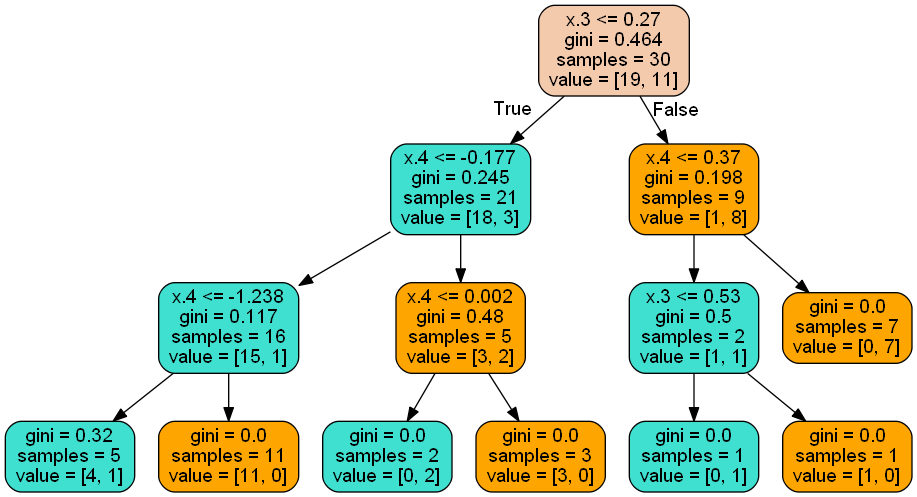

In [19]:
dot_data = tree.export_graphviz(clf,
                                feature_names=['x.1','x.2','x.3','x.4','x.5'],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

display(Image(graph.create_png()))

In [20]:
models = []
for i in range(200):
    samples_idx = np.random.choice(list(range(N)), N)
    X_ = X[samples_idx, :]
    Y_ = Y[samples_idx]
    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf.fit(X_, Y_)
    models.append(clf)

In [21]:
error_concensus = []
error_proba = []
for i in range(1, 200, 10):
    Y_test_hat = np.zeros(shape=(Y_test.shape[0], i))
    Y_test_hat_proba = np.zeros(shape=(Y_test.shape[0], i))
    for k in range(i):
        Y_test_hat[:, k] = models[k].predict(X_test)
        Y_test_hat_proba[:, k] = models[k].predict_proba(X_test)[:,1]
    error_concensus.append(np.mean(np.abs(Y_test - np.round(np.mean(Y_test_hat, axis=1)))))
    error_proba.append(np.mean(np.abs(Y_test - np.round(np.mean(Y_test_hat_proba, axis=1)))))

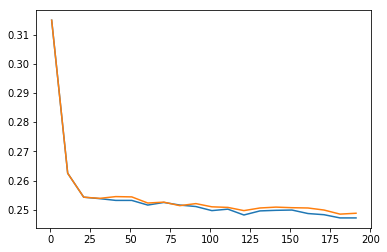

In [22]:
plt.plot(range(1,200, 10), error_concensus)
plt.plot(range(1,200, 10), error_proba)